# Left-Right symmetric model Lagrangian

In [1]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor
from sympy.physics import msigma 
init_printing()

## Covariant derivative

In [2]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [3]:
WL[0]*msigma(1)

⎡  0     W_L__1⎤
⎢              ⎥
⎣W_L__1    0   ⎦

In [4]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

In [5]:
WsigmaL

⎡     W_L__3        W_L__1 - ⅈ⋅W_L__2⎤
⎢                                    ⎥
⎣W_L__1 + ⅈ⋅W_L__2       -W_L__3     ⎦

In [6]:
WsigmaR

⎡     W_R__3        W_R__1 - ⅈ⋅W_R__2⎤
⎢                                    ⎥
⎣W_R__1 + ⅈ⋅W_R__2       -W_R__3     ⎦

In [7]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [8]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

In [9]:
WsigmaL, WsigmaR

⎛⎡W_L__3  W_L__+ ⎤  ⎡W_R__3  W_R__+ ⎤⎞
⎜⎢               ⎥, ⎢               ⎥⎟
⎝⎣W_L__-  -W_L__3⎦  ⎣W_R__-  -W_R__3⎦⎠

## Scalars

### Triplets

In [10]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0', real=True)
deltaR0 = symbols(r'\delta_R^0', real=True)

In [11]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

In [12]:
DeltaL, DeltaR

⎛⎡√2⋅\delta_L__+                  ⎤  ⎡√2⋅\delta_R__+                  ⎤⎞
⎜⎢──────────────   \delta_L__{++} ⎥  ⎢──────────────   \delta_R__{++} ⎥⎟
⎜⎢      2                         ⎥  ⎢      2                         ⎥⎟
⎜⎢                                ⎥, ⎢                                ⎥⎟
⎜⎢                -√2⋅\delta_L__+ ⎥  ⎢                -√2⋅\delta_R__+ ⎥⎟
⎜⎢ \delta_L__0    ────────────────⎥  ⎢ \delta_R__0    ────────────────⎥⎟
⎝⎣                       2        ⎦  ⎣                       2        ⎦⎠

In [13]:
vL, vR = symbols('v_L, v_R', positive=True)
vevL = {deltaL0:vL, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

⎛⎡ 0   0⎤  ⎡ 0   0⎤⎞
⎜⎢      ⎥, ⎢      ⎥⎟
⎝⎣v_L  0⎦  ⎣v_R  0⎦⎠

In [14]:
Dmu_DeltaL = (-I*g/2*(WsigmaL*DeltaL - DeltaL*WsigmaL) - I*gBL*(B-L)/2*Bmu*DeltaL).subs(B-L, 2) # B -L = 2 for triplets L and R
Dmu_DeltaR = (-I*g/2*(WsigmaR*DeltaR - DeltaR*WsigmaR) - I*gBL*(B-L)/2*Bmu*DeltaR).subs(B-L, 2)

In [15]:
Dmu_DeltaL

⎡  √2⋅ⅈ⋅B_\mu⋅\delta_L__+⋅g_{B-L}   ⅈ⋅g⋅(W_L__+⋅\delta_L__0 - W_L__-⋅\delta_L_
⎢- ────────────────────────────── - ──────────────────────────────────────────
⎢                2                                         2                  
⎢                                                                             
⎢                               ⅈ⋅g⋅(-2⋅W_L__3⋅\delta_L__0 + √2⋅W_L__-⋅\delta_
⎢-ⅈ⋅B_\mu⋅\delta_L__0⋅g_{B-L} - ──────────────────────────────────────────────
⎣                                                        2                    

_{++})                                    ⅈ⋅g⋅(2⋅W_L__3⋅\delta_L__{++} - √2⋅W_
──────  -ⅈ⋅B_\mu⋅\delta_L__{++}⋅g_{B-L} - ────────────────────────────────────
                                                                    2         
                                                                              
L__+)     √2⋅ⅈ⋅B_\mu⋅\delta_L__+⋅g_{B-L}   ⅈ⋅g⋅(-W_L__+⋅\delta_L__0 + W_L__-⋅\
─────     ────────────────────────────── - ────────

In [16]:
Dmu_DeltaR

⎡  √2⋅ⅈ⋅B_\mu⋅\delta_R__+⋅g_{B-L}   ⅈ⋅g⋅(W_R__+⋅\delta_R__0 - W_R__-⋅\delta_R_
⎢- ────────────────────────────── - ──────────────────────────────────────────
⎢                2                                         2                  
⎢                                                                             
⎢                               ⅈ⋅g⋅(-2⋅W_R__3⋅\delta_R__0 + √2⋅W_R__-⋅\delta_
⎢-ⅈ⋅B_\mu⋅\delta_R__0⋅g_{B-L} - ──────────────────────────────────────────────
⎣                                                        2                    

_{++})                                    ⅈ⋅g⋅(2⋅W_R__3⋅\delta_R__{++} - √2⋅W_
──────  -ⅈ⋅B_\mu⋅\delta_R__{++}⋅g_{B-L} - ────────────────────────────────────
                                                                    2         
                                                                              
R__+)     √2⋅ⅈ⋅B_\mu⋅\delta_R__+⋅g_{B-L}   ⅈ⋅g⋅(-W_R__+⋅\delta_R__0 + W_R__-⋅\
─────     ────────────────────────────── - ────────

In [17]:
conjugate_fields = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRmm):deltaRpp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm
}

In [18]:
Dmu_DeltaL_dagger = conjugate(Dmu_DeltaL.T).subs(conjugate_fields)
Dmu_DeltaR_dagger = conjugate(Dmu_DeltaR.T).subs(conjugate_fields)

Dmu_DeltaL_dagger, Dmu_DeltaR_dagger


⎛⎡  √2⋅ⅈ⋅B_\mu⋅\delta_L__-⋅g_{B-L}   ⅈ⋅g⋅(-W_L__+⋅\delta_L__{--} + W_L__-⋅\del
⎜⎢  ────────────────────────────── + ─────────────────────────────────────────
⎜⎢                2                                          2                
⎜⎢                                                                            
⎜⎢                                 ⅈ⋅g⋅(2⋅W_L__3⋅\delta_L__{--} - √2⋅W_L__-⋅\d
⎜⎢ⅈ⋅B_\mu⋅\delta_L__{--}⋅g_{B-L} + ───────────────────────────────────────────
⎝⎣                                                           2                

ta_L__0)                                   ⅈ⋅g⋅(-2⋅W_L__3⋅\delta_L__0 + √2⋅W_L
────────     ⅈ⋅B_\mu⋅\delta_L__0⋅g_{B-L} + ───────────────────────────────────
                                                                    2         
                                                                              
elta_L__-)    √2⋅ⅈ⋅B_\mu⋅\delta_L__-⋅g_{B-L}   ⅈ⋅g⋅(W_L__+⋅\delta_L__{--} - W_
──────────  - ────────────────────────────── + ────

In [19]:
Dmu_DL_Dmu = (Dmu_DeltaL_dagger*Dmu_DeltaL).subs(vevL)
Dmu_DL_Dmu.shape

In [20]:
Dmu_DL_Dmu[0,0].simplify()

In [21]:
Dmu_DL_Dmu[1,1].simplify()

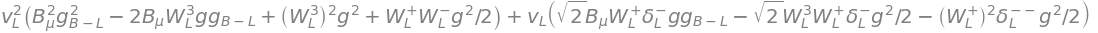

In [22]:
Tr_DmuL = trace(Dmu_DL_Dmu).expand().collect(vL)
Tr_DmuL

In [23]:
Dmu_DR_Dmu = (Dmu_DeltaR_dagger*Dmu_DeltaR).subs(vevR)

In [24]:
Dmu_DR_Dmu

⎡                            ⎛√2⋅ⅈ⋅B_\mu⋅\delta_R__-⋅g_{B-L}   ⅈ⋅g⋅(-W_R__+⋅\d
⎢             ⅈ⋅W_R__+⋅g⋅v_R⋅⎜────────────────────────────── + ───────────────
⎢                            ⎝              2                                 
⎢           - ────────────────────────────────────────────────────────────────
⎢                                                          2                  
⎢                                                                             
⎢                 ⎛                                 ⅈ⋅g⋅(2⋅W_R__3⋅\delta_R__{-
⎢  ⅈ⋅W_R__+⋅g⋅v_R⋅⎜ⅈ⋅B_\mu⋅\delta_R__{--}⋅g_{B-L} + ──────────────────────────
⎢                 ⎝                                                           
⎢- ───────────────────────────────────────────────────────────────────────────
⎣                                                     2                       

elta_R__{--} + W_R__-⋅v_R)⎞                                                   
──────────────────────────⎟                        

In [25]:
Dmu_DR_Dmu[0,0].simplify()

In [26]:
Dmu_DR_Dmu[1,1].simplify()

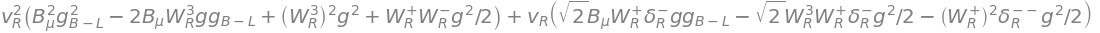

In [27]:
Tr_DmuR = trace(Dmu_DR_Dmu).expand().collect(vR)
Tr_DmuR

### Bidoublet

In [28]:
phi1p, phi1m = symbols(r'\phi_1^+, \phi_1^-')
phi2p, phi2m = symbols(r'\phi_2^+, \phi_2^-')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0', real=True)

In [29]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [phi2m, phi20]
    ]
)
Phi

⎡\phi⁰₁  \phi⁺₁⎤
⎢              ⎥
⎣\phi⁻₂  \phi⁰₂⎦

In [30]:
k, k1 = symbols("k, k_1", positive=True)
vevPhi = {phi10:k, phi20:k1, phi1p:0, phi2m:0, phi2p:0, phi1m:0}
Phi.subs(vevPhi)

⎡k  0 ⎤
⎢     ⎥
⎣0  k₁⎦

In [31]:
Dmu_Phi = -I*g/2*(WsigmaL*Phi - Phi*WsigmaR) # B - L = 0 for the bidoublet
Dmu_Phi

⎡-ⅈ⋅g⋅(W_L__3⋅\phi⁰₁ - W_R__3⋅\phi⁰₁ + W_L__+⋅\phi⁻₂ - W_R__-⋅\phi⁺₁)    -ⅈ⋅g⋅
⎢─────────────────────────────────────────────────────────────────────   ─────
⎢                                  2                                          
⎢                                                                             
⎢-ⅈ⋅g⋅(-W_L__3⋅\phi⁻₂ - W_R__3⋅\phi⁻₂ + W_L__-⋅\phi⁰₁ - W_R__-⋅\phi⁰₂)   -ⅈ⋅g⋅
⎢──────────────────────────────────────────────────────────────────────  ─────
⎣                                  2                                          

(W_L__3⋅\phi⁺₁ + W_R__3⋅\phi⁺₁ + W_L__+⋅\phi⁰₂ - W_R__+⋅\phi⁰₁)  ⎤
──────────────────────────────────────────────────────────────── ⎥
                             2                                   ⎥
                                                                 ⎥
(-W_L__3⋅\phi⁰₂ + W_R__3⋅\phi⁰₂ + W_L__-⋅\phi⁺₁ - W_R__+⋅\phi⁻₂) ⎥
─────────────────────────────────────────────────────────────────⎥
                             2              

In [32]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

In [33]:
Dmu_Phi_dagger = conjugate(Dmu_Phi.T).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

⎡ⅈ⋅g⋅(W_L__3⋅\phi⁰₁ - W_R__3⋅\phi⁰₁ + W_L__-⋅\phi⁺₂ - W_R__+⋅\phi⁻₁)  ⅈ⋅g⋅(-W_
⎢───────────────────────────────────────────────────────────────────  ────────
⎢                                 2                                           
⎢                                                                             
⎢ⅈ⋅g⋅(W_L__3⋅\phi⁻₁ + W_R__3⋅\phi⁻₁ + W_L__-⋅\phi⁰₂ - W_R__-⋅\phi⁰₁)  ⅈ⋅g⋅(-W_
⎢───────────────────────────────────────────────────────────────────  ────────
⎣                                 2                                           

L__3⋅\phi⁺₂ - W_R__3⋅\phi⁺₂ + W_L__+⋅\phi⁰₁ - W_R__+⋅\phi⁰₂)⎤
────────────────────────────────────────────────────────────⎥
                         2                                  ⎥
                                                            ⎥
L__3⋅\phi⁰₂ + W_R__3⋅\phi⁰₂ + W_L__+⋅\phi⁻₁ - W_R__-⋅\phi⁺₂)⎥
────────────────────────────────────────────────────────────⎥
                         2                                  ⎦

In [34]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(vevPhi)
Dmu_Phi_Dmu

⎡             2                      2    2                                   
⎢            g ⋅(W_L__3⋅k - W_R__3⋅k)    g ⋅(W_L__+⋅k - W_R__+⋅k₁)⋅(W_L__-⋅k -
⎢            ───────────────────────── + ─────────────────────────────────────
⎢                        4                                      4             
⎢                                                                             
⎢ 2                                                 2                         
⎢g ⋅(W_L__3⋅k - W_R__3⋅k)⋅(W_L__-⋅k₁ - W_R__-⋅k)   g ⋅(-W_L__3⋅k₁ + W_R__3⋅k₁)
⎢─────────────────────────────────────────────── + ───────────────────────────
⎣                       4                                                  4  

                          2                                                 2 
 W_R__-⋅k₁)              g ⋅(W_L__3⋅k - W_R__3⋅k)⋅(W_L__+⋅k₁ - W_R__+⋅k)   g ⋅
───────────              ─────────────────────────────────────────────── + ───
                                                4  

In [35]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu).expand().collect([k,k1])
Tr_DmuPhi 

### Kinetic Higgs lagrangian

In [36]:
LHiggs = Tr_DmuL + Tr_DmuR + Tr_DmuPhi 

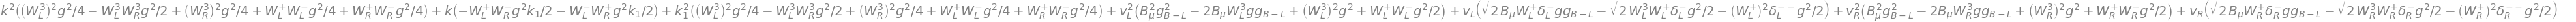

In [37]:
LHiggs

#### $W^\pm$ mass matrix

In [38]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
)
MW

⎡ 2 ⎛ 2     2        2⎞          2             ⎤
⎢g ⋅⎝k  + k₁  + 2⋅v_L ⎠        -g ⋅k⋅k₁        ⎥
⎢──────────────────────        ─────────       ⎥
⎢          4                       2           ⎥
⎢                                              ⎥
⎢        2                2 ⎛ 2     2        2⎞⎥
⎢      -g ⋅k⋅k₁          g ⋅⎝k  + k₁  + 2⋅v_R ⎠⎥
⎢      ─────────         ──────────────────────⎥
⎣          2                       4           ⎦

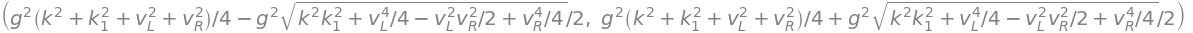

In [39]:
MW1square, MW2square = list(MW.eigenvals().keys())
MW1square, MW2square

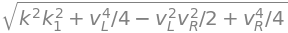

In [40]:
sqrt_vevs = MW1square.args[0].args[2]
sqrt_vevs

In [41]:
sqrt_vevs_sim = (sqrt_vevs.args[0] - k**2*k1**2).factor() + k**2*k1**2
sqrt_vevs_sim

Following the hierarchy $v_R >> k$ and $k_1 >> v_L$
$$ \sqrt{k^{2} k_{1}^{2} + \frac{\left(v_{L} - v_{R}\right)^{2} \left(v_{L} + v_{R}\right)^{2}}{4}} \approx 
\sqrt{k^{2} k_{1}^{2} + \frac{v_{R}^4}{4}} = \frac{v_R^2}{2}\sqrt{1+x}
$$
where $x = \frac{4 k^2k_1^2}{v_R^4} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

In [42]:
x = (4*k**2*k1**2)/vR**2
sqrt_vevs_approx = ((vR**2/2)*(1 + x/2)).simplify()
sqrt_vevs_approx

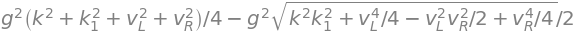

In [43]:
MW1square

In [44]:
kp_square, km_square = symbols('k_+^2, k_-^2', positive=True)
k2pm_subs = {
    k**2 + k1**2: kp_square,
    k**2 - k1**2: km_square
}
k2pm_subs

In [45]:
MW1square_approx = MW1square.subs(sqrt_vevs, sqrt_vevs_approx).subs(k2pm_subs).subs(vL,0).expand().collect(kp_square, factor)
MW1square_approx 

In [46]:
MW2square.subs(sqrt_vevs, sqrt_vevs_approx).subs(k2pm_subs).subs(vL,0).expand().collect(kp_square)


In [47]:
MW2square_approx = g**2/4*vR**2

In this approximation 
$$M_{W_2}^2 \approx \frac{g^2}{4}k_+^2\left(1 - \frac{2 k^2 k_1^2}{k_+^2} \right)$$
$$M_{W_2}^2 \approx \frac{g^2}{4}v_R^2$$

In [48]:
MW_approx = Matrix(
    [
        [MW1square_approx, 0 ],
        [0, MW2square_approx]
    ]
)
MW_approx

⎡   2  2   2    2             ⎤
⎢  g ⋅k ⋅k₁    g ⋅k²₊         ⎥
⎢- ───────── + ──────     0   ⎥
⎢      2         4            ⎥
⎢                             ⎥
⎢                       2    2⎥
⎢                      g ⋅v_R ⎥
⎢         0            ───────⎥
⎣                         4   ⎦

In this approximation the gauge eigenstates are also approximate mass eigenstates, ans since the expressions for current, etc., are simpler in the $W_{L,R}\pm$ basis ,it is often used in phenomenological studies. The mixing is given by 

$$\binom{W_L^{ \pm}}{W_R^{ \pm}}=\left(\begin{array}{cc}
\cos \zeta & -\sin \zeta e^{i \lambda} \\
\sin \zeta e^{-i \lambda} & \cos \zeta
\end{array}\right)\binom{W_1^{ \pm}}{W_2^{ \pm}} .$$

In [49]:
from sympy import cos, sin, tan

In [50]:
zeta = symbols(r'\zeta', positive=True)
cz = cos(zeta)
sz = sin(zeta)
sz, cz

In [51]:
RW = Matrix(
    [
        [cz, -sz],
        [sz, cz]
    ]
)
RW

⎡cos(\zeta)  -sin(\zeta)⎤
⎢                       ⎥
⎣sin(\zeta)  cos(\zeta) ⎦

In [52]:
W1p, W2p = symbols('W_1^+, W_2^+', real=True)

In [53]:
W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
W12p_doublet

⎡W⁺₁⎤
⎢   ⎥
⎣W⁺₂⎦

In [54]:
mixingW12 = RW*W12p_doublet
mixingW12

⎡W⁺₁⋅cos(\zeta) - W⁺₂⋅sin(\zeta)⎤
⎢                               ⎥
⎣W⁺₁⋅sin(\zeta) + W⁺₂⋅cos(\zeta)⎦

In [55]:
WLp

In [56]:
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

#### Neutral boson mass matrix

In [57]:
from sympy.tensor.array import derive_by_array

In [58]:
WLWRB = [W3L, W3R, Bmu]
M0_square = derive_by_array(derive_by_array(LHiggs, WLWRB), WLWRB).simplify().tomatrix()/2
M0_square

⎡ 2 ⎛ 2     2        2⎞      2 ⎛   2     2⎞                            ⎤
⎢g ⋅⎝k  + k₁  + 4⋅v_L ⎠     g ⋅⎝- k  - k₁ ⎠                       2    ⎥
⎢──────────────────────     ───────────────         -g⋅g_{B-L}⋅v_L     ⎥
⎢          4                       4                                   ⎥
⎢                                                                      ⎥
⎢    2 ⎛   2     2⎞       2 ⎛ 2     2        2⎞                        ⎥
⎢   g ⋅⎝- k  - k₁ ⎠      g ⋅⎝k  + k₁  + 4⋅v_R ⎠                   2    ⎥
⎢   ───────────────      ──────────────────────     -g⋅g_{B-L}⋅v_R     ⎥
⎢          4                       4                                   ⎥
⎢                                                                      ⎥
⎢                 2                       2             2 ⎛   2      2⎞⎥
⎣   -g⋅g_{B-L}⋅v_L          -g⋅g_{B-L}⋅v_R       g_{B-L} ⋅⎝v_L  + v_R ⎠⎦

In [59]:
M0_square = M0_square.subs(k2pm_subs)

In [60]:
M0_square#.subs(vL, 0)

⎡ 2 ⎛           2⎞        2                                  ⎤
⎢g ⋅⎝k²₊ + 4⋅v_L ⎠      -g ⋅k²₊                         2    ⎥
⎢─────────────────      ────────          -g⋅g_{B-L}⋅v_L     ⎥
⎢        4                 4                                 ⎥
⎢                                                            ⎥
⎢      2             2 ⎛           2⎞                        ⎥
⎢    -g ⋅k²₊        g ⋅⎝k²₊ + 4⋅v_R ⎠                   2    ⎥
⎢    ────────       ─────────────────     -g⋅g_{B-L}⋅v_R     ⎥
⎢       4                   4                                ⎥
⎢                                                            ⎥
⎢               2                  2          2 ⎛   2      2⎞⎥
⎣ -g⋅g_{B-L}⋅v_L     -g⋅g_{B-L}⋅v_R    g_{B-L} ⋅⎝v_L  + v_R ⎠⎦

In [61]:
M0_square.subs(vL, 0)

⎡  2             2                           ⎤
⎢ g ⋅k²₊       -g ⋅k²₊                       ⎥
⎢ ──────       ────────              0       ⎥
⎢   4             4                          ⎥
⎢                                            ⎥
⎢  2        2 ⎛           2⎞                 ⎥
⎢-g ⋅k²₊   g ⋅⎝k²₊ + 4⋅v_R ⎠                2⎥
⎢────────  ─────────────────  -g⋅g_{B-L}⋅v_R ⎥
⎢   4              4                         ⎥
⎢                                            ⎥
⎢                         2           2    2 ⎥
⎣   0       -g⋅g_{B-L}⋅v_R     g_{B-L} ⋅v_R  ⎦

In [62]:
MZ1_square, MZ2_square, MA_square = list((M0_square.subs(vL,0)).eigenvals().keys()) # list(MW.eigenvals().keys())

In [63]:
MA_square

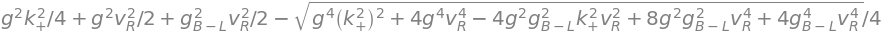

In [64]:
MZ1_square

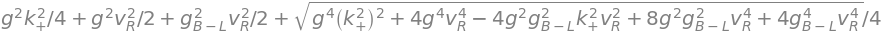

In [65]:
MZ2_square

If $v_R$ is large

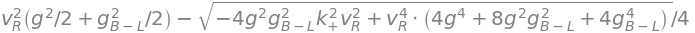

In [66]:
MZ1_square_approx = MZ1_square.subs(g**4*kp_square**2,0).subs(g**2*kp_square/4, 0).collect(vR)
MZ1_square_approx 

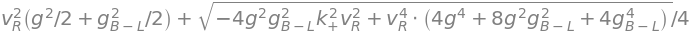

In [67]:
MZ2_square_approx = MZ2_square.subs(g**4*kp_square**2,0).subs(g**2*kp_square/4, 0).collect(vR)
MZ2_square_approx 

In [68]:
MZ_root = ((MZ2_square_approx - MZ1_square_approx)*2).args[0].collect(vR, factor)
MZ_root

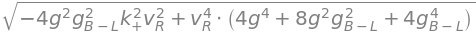

In [69]:
sqrt_Z = (MZ2_square_approx - MZ1_square_approx)*2
sqrt_Z

Following the limit $v_R$ large 
$$ \sqrt{- 4 g^{2} g_{B-L}^{2} k^{2}_{+} v_{R}^{2} + 4 v_{R}^{4} \left(g^{2} + g_{B-L}^{2}\right)^{2}} = 
2v_R^2(g^2 + g_{B-L}^2) \sqrt{1 - \frac{g^{2} g_{B-L}^{2} k^{2}_{+}}{v_{R}^{2} \left(g^{2} + g_{B-L}^{2}\right)^{2}}}
$$
if we consider $x = - \frac{g^{2} g_{B-L}^{2} k^{2}_{+}}{v_{R}^{2} \left(g^{2} + g_{B-L}^{2}\right)^{2}} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

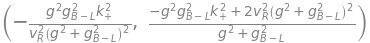

In [70]:
x = - (g**2*gBL**2*kp_square)/(vR**2*(g**2 + gBL**2)**2)
sqrt_Z_approx = ((2*vR**2*(g**2 + gBL**2))*(1 + x/2)).simplify()
x, sqrt_Z_approx

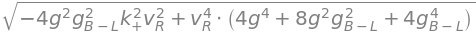

In [71]:
sqrt_Z

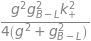

In [72]:
MZ1_square_approx2 = MZ1_square_approx.subs(sqrt_Z, sqrt_Z_approx).simplify()
MZ1_square_approx2

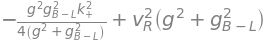

In [73]:
MZ2_square_approx = MZ2_square_approx.subs(sqrt_Z, sqrt_Z_approx).expand().collect(vR, factor)
MZ2_square_approx

Following the definitions ($g' = g_{B-L}$)

$$
\begin{aligned}
& s_W \equiv \sin \theta_W=\frac{g^{\prime}}{\sqrt{g^2+2 g^{\prime 2}}}, \\
& c_W \equiv \cos \theta_W=\sqrt{\frac{g^2+g^{\prime 2}}{g^2+2 g^{\prime 2}}} \\
& s_Y \equiv \sin \theta_Y=\frac{g^{\prime}}{\sqrt{g^2+g^{\prime 2}}} \\
& c_Y \equiv \cos \theta_Y=\frac{g}{\sqrt{g^2+g^{\prime 2}}}
\end{aligned}
$$

Then the mixing among, the weak eigenstates $W_L^3$ $W_R^3$ and $B$ with the physical eigen states is given by
$$
\left(\begin{array}{c}
A \\
Z_1 \\
Z_2
\end{array}\right)=\left(\begin{array}{ccc}
s_W & c_W s_Y & c_W c_Y \\
-c_W & s_W s_Y & s_W c_Y \\
0 & -c_Y & s_Y
\end{array}\right)\left(\begin{array}{c}
W_L^3 \\
W_R^3 \\
B
\end{array}\right)
$$

In [74]:
thW, thY = symbols(r'\theta_W, \theta_Y', positive=True)
cW, sW = cos(thW), sin(thW)
cY, sY = cos(thY), sin(thY)

In [75]:
RZ = Matrix(
    [
        [sW, cW*sY, cW*cY],
        [-cW, sW*sY, sW*cY],
        [0, -cY, sY]
    ]
)
RZ

⎡sin(\theta_W)   sin(\theta_Y)⋅cos(\theta_W)  cos(\theta_W)⋅cos(\theta_Y)⎤
⎢                                                                        ⎥
⎢-cos(\theta_W)  sin(\theta_W)⋅sin(\theta_Y)  sin(\theta_W)⋅cos(\theta_Y)⎥
⎢                                                                        ⎥
⎣      0               -cos(\theta_Y)                sin(\theta_Y)       ⎦

In [76]:
A, Z1, Z2 = symbols('A, Z_1, Z_2', real=True)
AZ12_triplet =  Matrix(
    [
        [A],
        [Z1],
        [Z2]
    ]
)
AZ12_triplet

⎡A ⎤
⎢  ⎥
⎢Z₁⎥
⎢  ⎥
⎣Z₂⎦

In [77]:
mixingAZ12 = RZ.T*AZ12_triplet
mixingAZ12

⎡                       A⋅sin(\theta_W) - Z₁⋅cos(\theta_W)                    
⎢                                                                             
⎢A⋅sin(\theta_Y)⋅cos(\theta_W) + Z₁⋅sin(\theta_W)⋅sin(\theta_Y) - Z₂⋅cos(\thet
⎢                                                                             
⎣A⋅cos(\theta_W)⋅cos(\theta_Y) + Z₁⋅sin(\theta_W)⋅cos(\theta_Y) + Z₂⋅sin(\thet

    ⎤
    ⎥
a_Y)⎥
    ⎥
a_Y)⎦

In [78]:
W3L_mix = mixingAZ12[0]
W3R_mix = mixingAZ12[1]
B_mix = mixingAZ12[2]

In [79]:
W3L_mix

In [80]:
W3R_mix

In [ ]:
B_mix

## Scalar potential and Higgs mass spectrum

In [166]:
from sympy.physics.quantum import Dagger
from sympy import solve

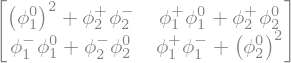

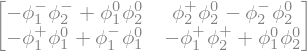

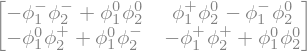

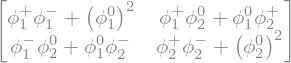

In [169]:
PhiDagger = Dagger(Phi).subs(conjugate_scalarsPhi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = msigma(2)*Phi*msigma(2)
#Phitilde
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde).subs(conjugate_scalarsPhi)
#PhitildeDagger
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)

In [170]:
conjugate_scalars_deltaL = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp
}

conjugate_scalars_deltaR = {
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(deltaRmm):deltaRpp
}

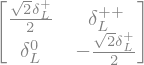

In [171]:
DeltaL

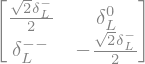

In [172]:
DeltaLDagger = Dagger(DeltaL).subs(conjugate_scalars_deltaL)
DeltaLDagger

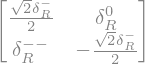

In [173]:
DeltaRDagger = Dagger(DeltaR).subs(conjugate_scalars_deltaR)
DeltaRDagger

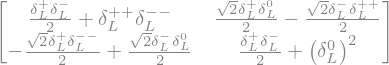

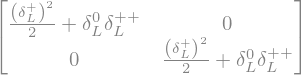

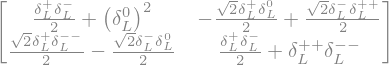

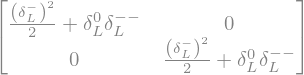

In [174]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

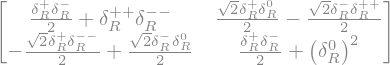

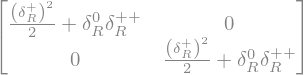

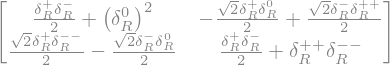

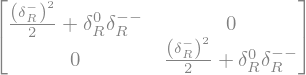

In [175]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [176]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

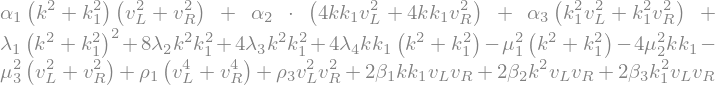

In [177]:
VLRPhi = (
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + lamb1*(trace(PhiDaggerPhi))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDaggerDeltaL) + trace(DeltaRDaggerDeltaR))
    + alpha2*(
        trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) 
        + trace(PhitildeDaggerPhi)*trace(DeltaLDaggerDeltaL) + trace(PhitildePhiDagger)*trace(DeltaRDaggerDeltaR)
    )
    + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    + beta3*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

In [178]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

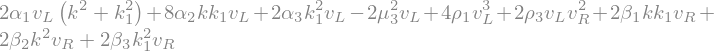

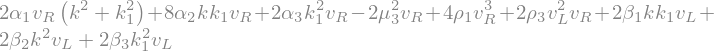

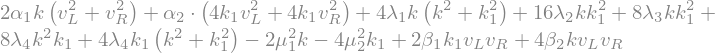

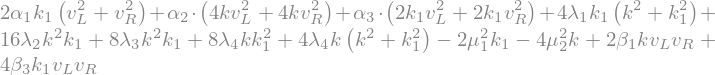

In [179]:
scalar_vevs = [vL, vR, k, k1]
for vev in scalar_vevs:
    display(VLRPhi_vev.diff(vev))

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

In [180]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (phi10r + I*phi10i)/sqrt2,
    phi20: (phi20r + I*phi20i)/sqrt2,
    deltaR0: (deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (deltaL0r + I*deltaL0i)/sqrt2
}

In [181]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

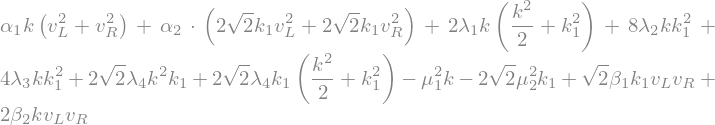

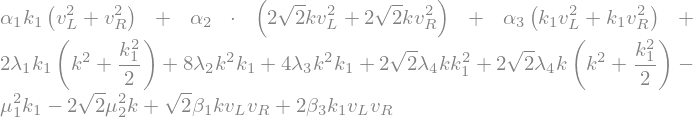

In [182]:
tadpol1 = VLRPhi.subs(phi10, (phi10r + I*phi10i)/sqrt2).diff(phi10r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi10r: k, phi10i: 0
    }
)
display(tadpol1)
tadpol2 = VLRPhi.subs(phi20, (phi20r + I*phi20i)/sqrt2).diff(phi20r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi20r: k1, phi20i: 0
    }
)
tadpol2

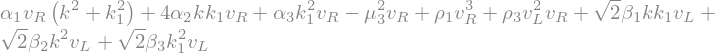

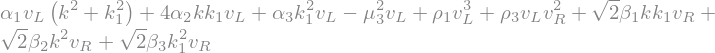

In [183]:
tadpol3 = VLRPhi.subs(deltaR0, (deltaR0r + I*deltaR0i)/sqrt2).diff(deltaR0r).subs(vevR).subs(vevPhi).subs(vevL).subs(
    {
        deltaR0r: vR, deltaR0i: 0
    }
)
display(tadpol3)
tadpol4 = VLRPhi.subs(deltaL0, (deltaL0r + I*deltaL0i)/sqrt2).diff(deltaL0r).subs(vevL).subs(vevPhi).subs(vevR).subs(
    {
        deltaL0r: vL, deltaL0i: 0
    }
)
tadpol4

In [184]:
tadpole12_sol = solve([tadpol1, tadpol2], [mu12, mu22], dict=True)[0]

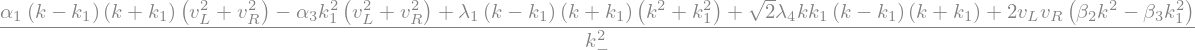

In [185]:
tadpole12_sol[mu12].subs(k2pm_subs).collect([alpha1, alpha3, lamb1, lamb4], factor).simplify()#.factor()

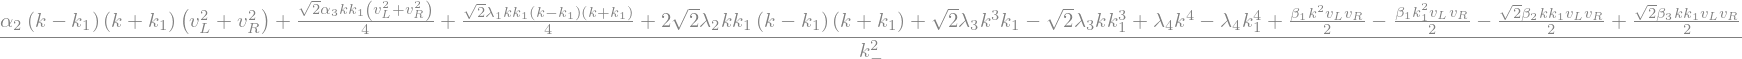

In [186]:
tadpole12_sol[mu22].simplify().subs(k2pm_subs).collect([alpha2, alpha3, lamb1, lamb2], factor).simplify()

In [187]:
tadpole34_sol = solve([tadpol3, tadpol4], [mu32, beta2], dict=True)[0]

In [188]:
tadpole34_sol[mu32].collect(alpha1, factor).subs(k2pm_subs).collect(rho1)

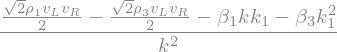

In [189]:
tadpole34_sol[beta2].simplify()

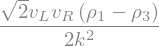

In [190]:
tadpole34_sol[beta2].simplify().subs(beta3, beta1).subs(beta1,0).simplify()

## Yukawa charged lepton sector

In [221]:
from sympy import IndexedBase, Idx

In [192]:
#Indexed?

In [203]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [204]:
#ht[i, j]

In [205]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [206]:
nueL, nuL[i]

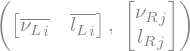

In [207]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

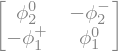

In [208]:
Phitilde

In [213]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

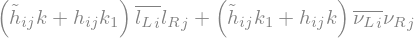

In [214]:
LY

Charged lepton mass

In [217]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [218]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [220]:
Ml = k*hij
Ml